# Análise de conjunto de dados vindo do Spotify

## Projeto da disciplina SCC0252 - Visualização Computacional

### Membros

* Alexandre E. de Souza Jesus - alexandre_souza@usp.br - **12559506**

* Eduardo Zaffari Monteiro - eduardozaffarimonteiro@usp.br - **12559490**

* Pedro Henrique de Freitas Maçonetto - pedromaconetto@usp.br - **12675419**

## Descrição do conjunto de dados

O conjunto de dados spotify-2023 contém uma lista abrangente das músicas mais famosas de 2023, conforme listadas no Spotify. O conjunto de dados oferece uma riqueza de recursos além do que normalmente está disponível em conjuntos de dados semelhantes. Ele fornece insights sobre os atributos de cada música, sua popularidade e presença em várias plataformas de música. O conjunto de dados inclui informações como nome da faixa, nome do(s) artista(s), data de lançamento, listas de reprodução e gráficos do Spotify, estatísticas de streaming, presença no Apple Music, presença no Deezer, gráficos do Shazam e vários recursos de áudio.

### Descrição das variáveis

**track_name**: Nome da música  
**artist(s)_name**: Nome do(s) artista(s) da música  
**artist_count**: Número de artistas que contribuíram para a música  
**released_year**: Ano em que a música foi lançada  
**released_month**: Mês em que a música foi lançada  
**released_day**: Dia do mês em que a música foi lançada  
**in_spotify_playlists**: Número de listas de reprodução do Spotify nas quais a música está incluída  
**in_spotify_charts**: Presença e posição da música nas gráficos do Spotify  
**streams**: Número total de reproduções no Spotify  
**in_apple_playlists**: Número de listas de reprodução do Apple Music nas quais a música está incluída  
**in_apple_charts**: Presença e posição da música nas gráficos do Apple Music  
**in_deezer_playlists**: Número de listas de reprodução do Deezer nas quais a música está incluída  
**in_deezer_charts**: Presença e posição da música nas gráficos do Deezer  
**in_shazam_charts**: Presença e posição da música nas gráficos do Shazam  
**bpm**: Batidas por minuto, medida do ritmo da música  
**key**: Tonalidade da música  
**mode**: Modo da música (maior ou menor)  
**danceability_%**: Porcentagem que indica o quão adequada a música é para dançar  
**valence_%**: Positividade do conteúdo musical da música  
**energy_%**: Nível percebido de energia da música  
**acousticness_%**: Quantidade de som acústico na música  
**instrumentalness_%**: Quantidade de conteúdo instrumental na música  
**liveness_%**: Presença de elementos de performance ao vivo  
**speechiness_%**: Quantidade de palavras faladas na música  


### Possíveis usos para os dados

A análise musical permite explorar padrões nas características de áudio para entender as tendências e preferências em músicas populares. Além disso, é possível comparar a popularidade de uma música em diversas plataformas de música, o que nos ajuda a compreender seu alcance. Ao analisar o envolvimento do artista e suas características, podemos entender como isso se relaciona com o sucesso de uma música. Também é importante identificar mudanças ao longo do tempo nas características musicais e nas preferências do público. Por fim, investigar como as músicas performam em diferentes serviços de streaming nos fornece insights valiosos sobre sua presença em várias plataformas. Essas análises combinadas nos ajudam a compreender melhor a dinâmica da indústria da música e as escolhas dos ouvintes.

## Obtendo dados e exploração inicial

In [3]:
# Importando bibliotecas
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Obtendo conjunto de dados
df = pd.read_csv('https://raw.githubusercontent.com/EduardoDuX/DataViz/main/spotify-2023.csv', encoding='latin-1')

In [5]:
# Visualização em formato de tabela
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
%%capture
stream = df['streams'].apply(lambda x: x.isnumeric())
df = df[stream]
df['streams'] = df['streams'].astype('int64')

In [7]:
# Algumas medidas de posição e dispersão para as variáveis numéricas
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Visualizações dos dados

In [8]:
a = df[['released_year', 'key', 'in_spotify_playlists']].groupby(['released_year', 'key']).sum().reset_index()

Existe alguma diferença entre a tonalidade das músicas mais antigas que continuam populares e as músicas populares lançadas nos últimos anos? Dentre as músicas populares, a maioria delas são recentes? Esses questionamentos podem ser verificados com um gráfico de barras, em que no eixo Y há a quantia de playlists em que as músicas de um ano se encontram, e no eixo X há o ano de lançamento das músicas, adicionalmente, a porcentagem de músicas de cada tonalidade será indicada pela cor das barras.

In [9]:
fig = px.bar(a,
             x='released_year',
             y='in_spotify_playlists',
             color="key",
             title='Aparecimento em playlists do Spotify por ano de lançamento por tonalidade',
             labels={
                     "in_spotify_playlists": "Playlists do Spotify",
                     "released_year": "Ano de lançamento",
                     "key": "Tonalidade"
                 })
fig.show()

Pode se concluir que as músicas mais populares tendem a serem atuais, lançadas após o ano de 2010, porém algumas músicas antigas resistiram ao teste do tempo e continuam sendo muito ouvidas nos dias de hoje. Também é evidente que as músicas populares são de diversas tonalidade atualmente, para as músicas antigas é difícil dizer devido à pequena presença dessas músicas dentre as populares na atualidade.

---
Nos últimos anos tem-se popularizado músicas mais curtas e com refrões curtos e repetitivos, vemos essas músicas principalmente em aplicativos de vídeos curtos como o TikTok e o Instagram, vamos analisar como essa visão se demonstra pelos dados.

In [10]:
temp = df[['speechiness_%', 'streams']].groupby('speechiness_%').mean().reset_index().sort_values(by='speechiness_%')
fig = px.line(temp, x='speechiness_%', y='streams', title='Popularidade por porcentagem de fala')
fig.show()

Podemos observar que, fora algumas variações que podem ser outliers, existe uma tendência de alta para músicas com menor porcentagem de falas.

Outra análise que podemos fazer é por conta da dançabilidade de uma música dado seu bpm, sabemos que antigamente músicas como valsa, entre outros, tinha bpm's menóres e eram utilizados para dança. Hojem em dia temos uma popularidade maior de músicas com um bpm alto, que podem varias de 70 a 120 bpm. Em contra partida, bpm's muito altos são intuitivamente mais dificeis de dançar.
Vamos analisar então o que os dados nos dizem.

In [11]:
temp = df[['bpm', 'danceability_%']].groupby('bpm').mean().reset_index().sort_values(by='bpm')
fig = px.line(temp, x='bpm', y='danceability_%')
fig.show()

Podemos vem que entre os 110 bpm's temos a maior taxa de dançabilidade, acima de 130 entra em uma queda, e antes dos 75 também temos uma queda.

Alguns artistas sempre se destacam dos demais, lançando músicas com muitos ouvintes, frequentemente.

Para isso é possível análisar esses artistas "Fora da Curva" pela quantidade de ouvintes que eles possuem, a média pode não ser um bom parâmetro neste caso já que um artista com uma única música que "estourou" pode ter uma média maior que um artista com músicas populares frequentes.

In [12]:
temp = df['artist(s)_name'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).reset_index().rename(columns={'index': 'Index', 0: 'artist(s)_name'})
df = df.drop('artist(s)_name', axis=1)
df2 = df.merge(temp, right_on='Index', left_index=True)
df2 = df2.drop('Index', axis=1)
df2['artist(s)_name'] = df2['artist(s)_name'].apply(lambda x: x.strip())

In [13]:
df_outliers = df2[['artist(s)_name', 'streams']].groupby('artist(s)_name').sum().reset_index()
Q3 = df_outliers['streams'].quantile(.75)
Q1 = df_outliers['streams'].quantile(.25)
dif = Q3-Q1
superior = Q3 + 1.5 * dif
df_outliers= df_outliers.loc[df_outliers['streams'] >= superior]


In [14]:
px.bar(df_outliers.sort_values(by='streams', ascending = False), x='artist(s)_name', y='streams', title='Artistas "Fora da Curva"')

É intuitivo pensar que, quanto mais popular um música for, mais as pessoas irão adicioná-las e suas playlists, porém o quanto a quantidade de artistas nessa música pode influenciar essa análise?

In [15]:
px.scatter(df, size='artist_count', y='streams', x='in_spotify_playlists', color='artist_count', title = 'Popularidade por aparecimento em playlists dado o número de artistas')

---

Um bom indicativo para determinar a popularidade das músicas é o quanto elas aparecem em playlists. Entretando, é possível que os serviços de música tenham perfis de usuários diferentes. Dessa forma, pode-se realizar as seguintes pergunta: as playlists nos serviços de música Spotify, Apple Music e Deezer são parecidas? Se sim, quanto?

In [16]:
# Transformando string de número com vírgula em números inteiros
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '').astype(int)

In [17]:
# Calculando correlações
correlations = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].corr()
correlations

,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
in_spotify_playlists,1.000000,0.708258,0.826388
in_apple_playlists,0.708258,1.000000,0.472034
in_deezer_playlists,0.826388,0.472034,1.000000


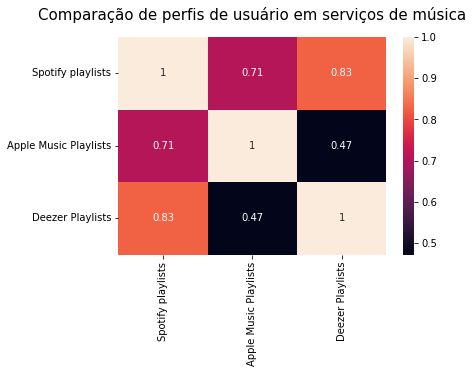

<Figure size 1440x1800 with 0 Axes>

In [18]:
# Novos nomes para as variáveis
new_names = {'in_spotify_playlists': 'Spotify playlists',
              'in_apple_playlists': 'Apple Music Playlists',
              'in_deezer_playlists': 'Deezer Playlists'}
correlations = correlations.rename(columns=new_names, index=new_names)

# Plotando o gráfico
ax = plt.axes()
plt.figure(figsize=(20, 25))
sns.heatmap(correlations, annot=True, ax=ax)
ax.set_title('Comparação de perfis de usuário em serviços de música', fontsize=15, pad=17)

plt.show()

Com base no mapa de calor acima e nas correlações, é possível observar que as playlists do Spotify e do Apple Music estão correlacionadas, o que pode ser um indicativo de que o perfil de usuário entre esses serviços é parecido. O mesmo vale para o Spotify e para o Deezer, que apresentam correlação ainda maior entre si: 0.83, contra os 0.71 entre Spotify e Apple.

Entretanto, ao comparar as plataformas Deezer e Apple Music, a correlação diminui bastante, o que pode indicar que os usuários dessas duas plataformas não possuem muitos interesses em comum.

---

É possível, também, analisar a popularidade de um artista a partir do número de músicas dele que estão "charteando", ou seja, que estão presentes nas paradas musicais

In [19]:
# Coletando informações dos artistas com mais músicas nos charts do Spotify
df_artists_pop = df2[['artist(s)_name', 'in_spotify_charts']].groupby('artist(s)_name').sum().reset_index()
df_artists_pop = df_artists_pop.drop(0)

# Convertendo essas informações para um dicionário
dict_pop = df_artists_pop.set_index('artist(s)_name').T.to_dict('in_spotify_charts')
dict_pop = dict_pop['in_spotify_charts']

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_19616\3945411706.py:6: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



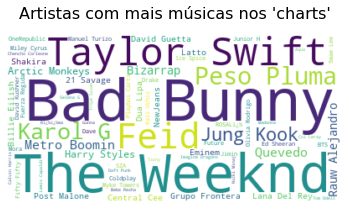

In [20]:
# Criando e exibindo a nuvem de palavras
wc = WordCloud(background_color='white', margin=3).fit_words(dict_pop)

plt.imshow(wc, interpolation='bilinear')
plt.title('Artistas com mais músicas nos \'charts\'', pad=17, fontsize=16)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

A visualização acima é uma maneira de identificar a popularidade de artistas. Quanto mais músicas na parada do Spotify, maior será o seu nome. Sendo assim, os artistas mais populares de acordo com essa métrica seriam Bad Bunny, The Weeknd, Taylor Swift, entre outros.

---

### PCA

Finalmente, para visualizar os dados por inteiro, será feito um PCA, a fim de encontrar os 2 eixos que compreendem a maior parte da variabilidade dos dados, e os 2 eixos serão utilizados para visualizar os dados em um gráfico de dispersão.

In [21]:
df_numerico = df[df.select_dtypes(include=['int64']).columns.tolist()] # Obtendo colunas numéricas dos dados
scaler = StandardScaler() # Normaliza os dados para PCA
pca = PCA(n_components=2) # 2 componentes para possibilitar plotagem
df_norm = scaler.fit_transform(df_numerico)
df_pca = pd.DataFrame(pca.fit_transform(df_norm)).rename({0: 'Componente Principal 1', 1: 'Componente Principal 2'}, axis=1)
print(f'Os 2 primeiros componentes principais compreendem, respectivamente a {*pca.explained_variance_ratio_,}% da variância dos dados')

Os 2 primeiros componentes principais compreendem, respectivamente a (0.18028395727611599, 0.1235286848278706)% da variância dos dados


Podemos ver que os 2 componentes principais dos dados em conjunto demonstram 30% da variância dos dados

In [22]:
pd.DataFrame([df_numerico.columns, pca.components_[0], pca.components_[1]]).rename({0:'Variável', 1: 'Autovetor 1', 2: 'Autovetor 2'}).T

,Variável,Autovetor 1,Autovetor 2
0,artist_count,-0.089518,-0.24126
1,released_year,-0.167139,-0.252894
2,released_month,-0.049233,0.071775
3,released_day,-0.006955,-0.0994
4,in_spotify_playlists,0.442215,0.122462
5,in_spotify_charts,0.3023,-0.192161
6,streams,0.463605,0.114856
7,in_apple_playlists,0.472044,0.010521
8,in_apple_charts,0.352597,-0.124107
9,in_deezer_charts,0.293667,-0.20478


Em análise, podemos ver que o primeiro componente principal é composto principalmente de uma soma de medidas de popularidade, como a presença em playlists e gráficos de diversas plataformas, e quantidade de ouvintes. Já o segundo é composto principalmente pelo contraste entre o quão acústica a música é com o quão enérgica, dançável e positiva ela é.

In [23]:
px.scatter(df_pca, x = 'Componente Principal 1', y = 'Componente Principal 2')

Dada a interpretação anterior dos componentes, pode-se notar que a maioria das músicas tem um valor comum de popularidade, e poucas músicas se encontram muito à direita, indicando um valor muito alto do 1 componente principal, e portanto uma popularidade significativamente maior que as demais. É importante reiterar que todas as músicas dos dados são populares, inclusive as que se encontram à esquerda.